In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'   # enable if you have a retina display
matplotlib.rc('font', size = 16)                 # Use big fonts...
plt.rcParams['figure.figsize'] = (10, 8)         # ... and big plotl

import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

plt.style.use('Joey')

In [10]:
namebase = '20230705_voltagescan_1Vstep'

dfs = {}
for direction in ('increasing', 'decreasing'):
    name = namebase + f'_{direction}V'
    fname = f'../data/{name}.csv'
    dfs[direction] = pd.read_csv(fname, index_col=0)

In [19]:
c_to_dist = lambda c: 140*50/c

/var/folders/77/q538nk0d3qdgycztd5v9j59c0000gn/T/ipykernel_56029/1656388222.py:1: RuntimeWarning: divide by zero encountered in true_divide
  c_to_dist = lambda c: 140*50/c


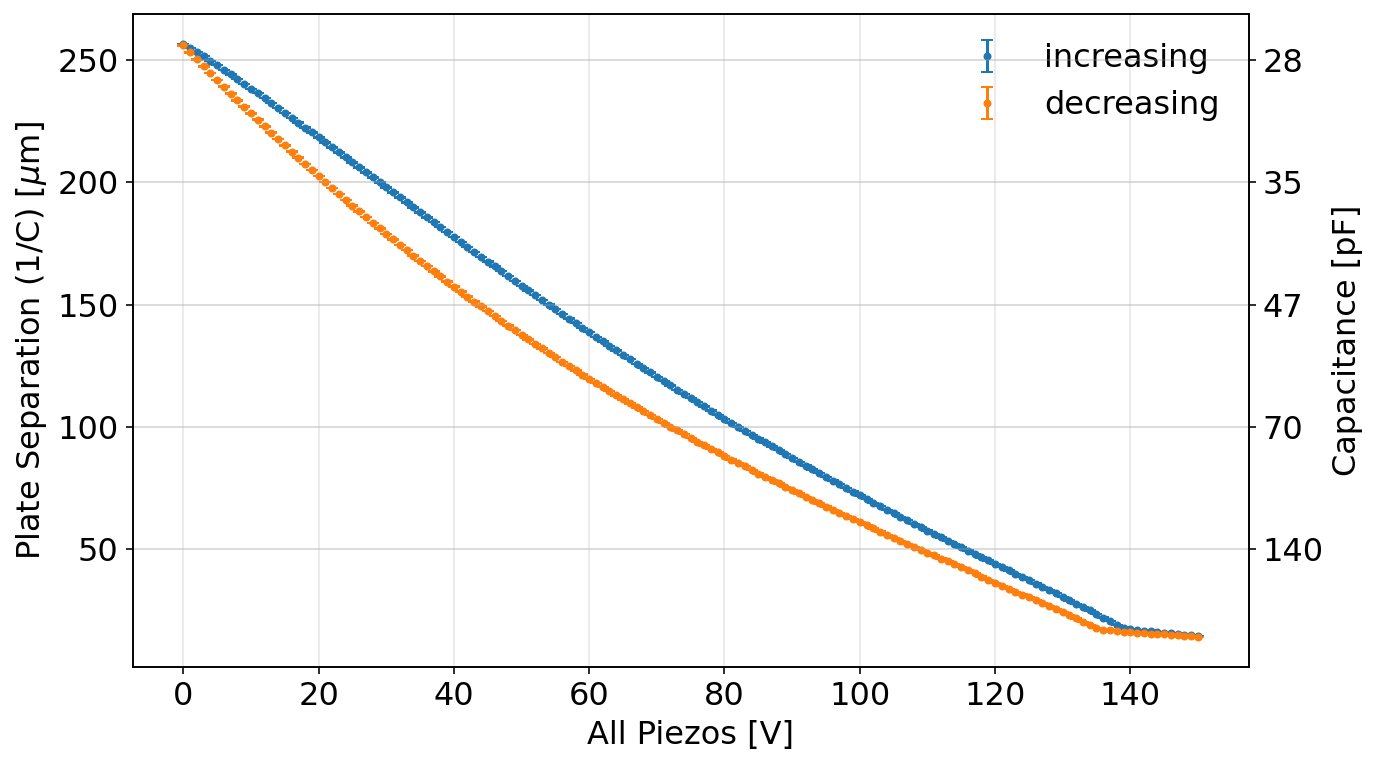

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

for direction in ('increasing', 'decreasing'):
    df = dfs[direction]
    plt.errorbar(
        df.voltage, 
        c_to_dist(df.cmean), 
        yerr=c_to_dist(df.cmean)*df.cstd/df.cmean, 
        capsize=3,
        fmt='.', 
        label=direction
    )
    

plt.xlabel('All Piezos [V]')
plt.ylabel(r'Plate Separation (1/C) [$\mu \mathrm{m}$]')
plt.legend()
ax2 = ax.twinx()

yrange = ax.get_ylim()
concticks = ax.get_yticks()
lifetimerange = c_to_dist(concticks)
values = lifetimerange
positions = c_to_dist(lifetimerange)
plt.yticks(positions, labels=values.round().astype(int))

plt.ylabel('Capacitance [pF]')
plt.ylim(yrange)


plt.ylim(yrange)
plt.show()